### Projeto - Redes Convolucionais

Fazer no Colab: https://colab.research.google.com/drive/1S7NH-jVR-kB84vvxr-bWd7LfkO8lLyLn

No Kaggle: https://www.kaggle.com/datasets/tanlikesmath/the-oxfordiiit-pet-dataset

notebook: https://www.kaggle.com/code/yosshi999/oxfordiiit-pet-classification

https://www.kaggle.com/code/sarthakh/data-loading-cnn-and-transfer-learning-with-tf

Na disciplina foram vistos diferentes conceitos e arquiteturas de redes convolucionais. O uso de cada abordagem depende principalmente do problema e da base de dados. Sendo assim, esse projeto tem como objetivo avaliar os conhecimentos de diferentes partes do conteúdo. Para isso, deverão ser desenvolvidas nesse notebook:

1 - Uma arquitetura de rede CNN implementada pelo próprio aluno

2 - Utilização de uma arquitetura de rede proposta na literatura (e.g. ResNet, VGG, EfficientNet) por meio de modelos pré-treinados

3 - Utilização de uma arquitetura de rede proposta na literatura (e.g. ResNet, VGG, EfficientNet), realizando treinamento dessa rede

### A Base de dados

Para desenvolver o projeto, será utilizado o dataset [The Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/). Este dataset possui diferentes raças de cachorros e gatos, conforme ilustrado na figura baixo.

![Title](breeds.png)

We have created a 37 category pet dataset with roughly 200 images for each class. The images have a large variations in scale, pose and lighting. All images have an associated ground truth annotation of breed, head ROI, and pixel level trimap segmentation.

Para essa base de dados, os pontos 1,2 e 3 descritos no tópico anterior deverão ser realizados para desenvolver duas soluções:

1 - Um classificador de gatos e cachorros

2 - Um classificador de raças de animais 

OBS: O ponto 2, a princípio, deverá ser realizado com todas as raças de gatos e cachorros. Entretanto, caso desejem, podem dividir o problema em duas redes: uma para raças de gatos e outra para raças de cachorros. 


### Critérios de Avaliação

Serão tidos como critérios de avaliação:

* A implementação das soluções descritas
* Descrição da análise e comparação de resultados de cada solução

### Solução 1 - Classificador de gatos e cachorros

Para implementação dessa solução, as seguintes etapas deverão ser realizadas:

1 - Leitura da base de dados (recomendado utilizar as funções do Keras de leitura em Batch https://keras.io/api/preprocessing/image/)

2 - Visualização de imagens do dataset. Como você avalia as imagens desta base de dados para cada classe?

3 - Quais as dimensões e quantos canais de cores possuem a imagem?

4 - Implementação de pelo menos uma arquitetura de rede CNN: 

  * Qual o desempenho da rede? (métrica de classificação a critério do aluno)
  * A rede apresenta overfiting ou underfiting? 
  
5 - Utilize a base de dados em tons de cinza e realize o treinamento novamente da arquitetura proposta no ponto anterior. Existe alguma diferença de desempenho da rede?

6 - Escolha uma arquitetura de rede proposta na literatura (disponíveis em https://keras.io/api/applications/)

* Utilizando a rede escolhida de forma pré-treinada, qual o desempenho desta arquitetura para este problema?
* A rede apresenta overfiting ou underfiting?
* Descongele parcialmente a rede escolhida, foi observada mudança de desempenho do modelo?
* Adicione camadas na rede, foi observada mudança de desempenho do modelo?
* Descongele totalmente a rede escolhida, foi observada mudança de desempenho do modelo?

### Solução 2 - Classificar raças de animais

1 - Implementação de pelo menos uma arquitetura de rede CNN: 

  * Qual o desempenho da rede? (métrica de classificação a critério do aluno)
  * A rede apresenta overfiting ou underfiting? 

2 - Escolha uma arquitetura de rede proposta na literatura (disponíveis em https://keras.io/api/applications/)

* Utilizando a rede escolhida de forma pré-treinada, qual o desempenho desta arquitetura para este problema?
* A rede apresenta overfiting ou underfiting?
* Descongele parcialmente a rede escolhida, foi observada mudança de desempenho do modelo?
* Adicione camadas na rede, foi observada mudança de desempenho do modelo?
* Descongele totalmente a rede escolhida, foi observada mudança de desempenho do modelo?

3 - Escolha pelo menos uma arquitetura de rede dos tópicos 1 ou 2 e utilize técnicas de oversampling (https://keras.io/api/preprocessing/image/ ou https://albumentations.ai) nesta rede. Como você avalia o desempenho do modelo realizando o oversampling?

4 - Escolha o melhor modelo de rede desenvolvido nos tópicos anteriores e analise os resultados:
  * Qual o desempenho do modelo para cada raça?
  * Quais raças possuem menor desempenho? 
  * Existe algum pre-processamento que você acredite que possa melhorar o desempenho do modelo para estas raças de menor desempenho?

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

### 1) Leitura da base de dados

In [2]:
# Criando uma dataset com a classe, target e o path das imagens

# https://www.kaggle.com/code/yosshi999/oxfordiiit-pet-classification
import glob

# Localização de todas as imagens
dir_name="../../../Projeto Redes Neurais/images/*"

# Para puxar os nomes dos arquivos
pets_files = glob.glob(dir_name) 

# Criando as colunas do dataframe
pets_df = pd.DataFrame(pets_files)
pets_df["file_name"] = pets_df[0].map(lambda x: x.split("\\")[1])
pets_df["class"] = pets_df["file_name"].map(lambda x: x.split("_")[0])
pets_df["path"] = pets_df["file_name"].map(lambda x: f"../../../Projeto Redes Neurais/images/{x}")
pets_df.drop(columns = [0], inplace = True)
# Coluna de target
pets_df['target'] = pets_df['class'].apply(lambda x: 'cat' if x[0].isupper() else "dog")

In [3]:
pets_df

,file_name,class,path,target
0,Abyssinian_1.jpg,Abyssinian,../../../Projeto Redes Neurais/images/Abyssini...,cat
1,Abyssinian_10.jpg,Abyssinian,../../../Projeto Redes Neurais/images/Abyssini...,cat
2,Abyssinian_100.jpg,Abyssinian,../../../Projeto Redes Neurais/images/Abyssini...,cat
3,Abyssinian_100.mat,Abyssinian,../../../Projeto Redes Neurais/images/Abyssini...,cat
4,Abyssinian_101.jpg,Abyssinian,../../../Projeto Redes Neurais/images/Abyssini...,cat
...,...,...,...,...
7388,yorkshire_terrier_95.jpg,yorkshire,../../../Projeto Redes Neurais/images/yorkshir...,dog
7389,yorkshire_terrier_96.jpg,yorkshire,../../../Projeto Redes Neurais/images/yorkshir...,dog
7390,yorkshire_terrier_97.jpg,yorkshire,../../../Projeto Redes Neurais/images/yorkshir...,dog
7391,yorkshire_terrier_98.jpg,yorkshire,../../../Projeto Redes Neurais/images/yorkshir...,dog


### 2) Visualizando a imagem a partir do dataset acima

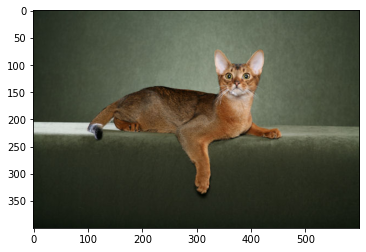

In [4]:
# Chacando a visualização da Imagem a partir do dataset acima
from PIL import Image

img = Image.open(pets_df["path"][0])
plt.imshow(img)
plt.show()

### Para separar gatos de cachorros em pastas diferentes
Criar duas pastas: 'CATS' e 'DOGS' e rodar o código abaixo (1 vez).

```python 
import shutil

# Diretório de gatos
for i in range(len(pets_df)):
    if pets_df["target"][i] == "cat":
        shutil.copy(pets_df["path"][i], "../../../Projeto Redes Neurais/dataset/CATS")

# Diretório de cachorros
for i in range(len(pets_df)):
    if pets_df["target"][i] == "dog":
        shutil.copy(pets_df["path"][i], "../../../Projeto Redes Neurais/dataset/DOGS")
```

### Separar dataset de treino e validação

In [4]:
path_dir = "../../../Projeto Redes Neurais/dataset"

In [6]:
# Puxando os dados de um diretório contendo outros dois diretórios
import tensorflow as tf
from tensorflow.keras.preprocessing import image

## define o generator escalando as imagens do dataset
train_datagen = image.ImageDataGenerator(validation_split=0.2,
                                         rescale=1/255)

### pega as imagens de um dataset
train_dataset = train_datagen.flow_from_directory(path_dir,
                                                  target_size=(128, 128), # tamanho da base: pixel por pixel
                                                  color_mode = 'rgb',
                                                  batch_size=64, # puxadas por batch
                                                  class_mode='binary', # binario ou categórico
                                                  subset='training',
                                                  shuffle = True)

### pega as imagens de um dataset
val_dataset = train_datagen.flow_from_directory(path_dir,
                                                target_size=(128, 128),
                                                color_mode = 'rgb',
                                                batch_size=64,
                                                class_mode='binary',
                                                subset='validation',
                                                shuffle = True)

Found 5912 images belonging to 2 classes.
Found 1478 images belonging to 2 classes.


### 2) Visualização das imagens train_dataset e o label

1.0


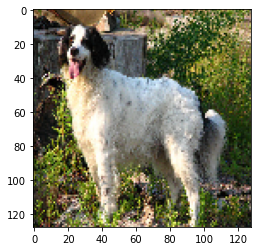

1.0


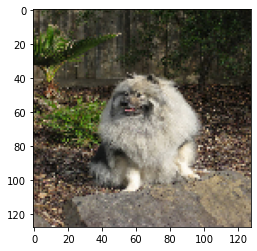

1.0


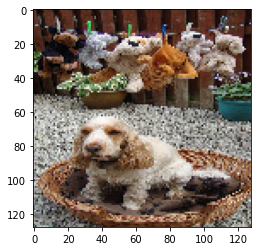

1.0


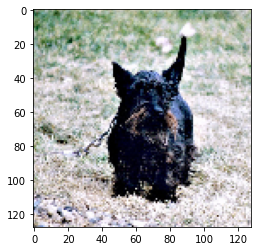

1.0


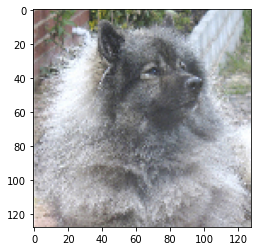

In [7]:
# Visualização de amostras ({0: gato, 1: cachorro})
import matplotlib.pyplot as plt
import numpy as np

for _ in range(5):
    img, label = train_dataset.next()
    print(label[0])
    plt.imshow(img[0])
    plt.show()

----

## Modelos de Redes Neurais

In [2]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

----

### Modelo 01 - CNN com três convoluções, seguido de MaxPooling

In [9]:
# Modelo 01
cnn = Sequential()

# adicionando convolução (5x5) seguido de MaxPooling (2x2)
cnn.add(Conv2D(24, (5,5), activation='relu', input_shape=(128,128,3), padding='same'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(48, (5,5), activation='relu', input_shape=(128,128,3), padding='same'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(96, (5,5), activation='relu', input_shape=(128,128,3), padding='same'))
cnn.add(MaxPooling2D())

cnn.add(Flatten())
# Output binário
cnn.add(Dense(1))
cnn.add(Activation('sigmoid'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 48)        28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        115296    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 96)       0

In [10]:
# binary_crossentropy, problema binário
cnn.compile(loss = 'binary_crossentropy',
            optimizer = 'Adam',
            metrics=['accuracy'])

In [11]:
# Regularização
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0.001,
                   patience = 5,
                   verbose = 1,
                   mode = 'auto')

# Salva a época com melhor acurácia
checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath="model_01_checkpoint",
        save_best_only=True,
        monitor="val_loss")

# Fitting
historico = cnn.fit(train_dataset, 
                    epochs = 20, 
                    batch_size=32,
                    verbose = 1,
                    validation_data = (val_dataset),
                    callbacks = [es, checkpoint])

Epoch 1/20
93/93 [==============================] - ETA: 0s - loss: 0.6184 - accuracy: 0.6756

INFO:tensorflow:Assets written to: model_01_checkpoint\assets


INFO:tensorflow:Assets written to: model_01_checkpoint\assets


93/93 [==============================] - 137s 1s/step - loss: 0.6184 - accuracy: 0.6756 - val_loss: 0.6194 - val_accuracy: 0.6779
Epoch 2/20
93/93 [==============================] - ETA: 0s - loss: 0.5677 - accuracy: 0.7052

INFO:tensorflow:Assets written to: model_01_checkpoint\assets


INFO:tensorflow:Assets written to: model_01_checkpoint\assets


93/93 [==============================] - 139s 1s/step - loss: 0.5677 - accuracy: 0.7052 - val_loss: 0.5605 - val_accuracy: 0.7124
Epoch 3/20
93/93 [==============================] - ETA: 0s - loss: 0.5331 - accuracy: 0.7248

INFO:tensorflow:Assets written to: model_01_checkpoint\assets


INFO:tensorflow:Assets written to: model_01_checkpoint\assets


93/93 [==============================] - 137s 1s/step - loss: 0.5331 - accuracy: 0.7248 - val_loss: 0.5597 - val_accuracy: 0.7145
Epoch 4/20
93/93 [==============================] - ETA: 0s - loss: 0.4898 - accuracy: 0.7627

INFO:tensorflow:Assets written to: model_01_checkpoint\assets


INFO:tensorflow:Assets written to: model_01_checkpoint\assets


93/93 [==============================] - 137s 1s/step - loss: 0.4898 - accuracy: 0.7627 - val_loss: 0.5172 - val_accuracy: 0.7334
Epoch 5/20
93/93 [==============================] - ETA: 0s - loss: 0.4478 - accuracy: 0.7889

INFO:tensorflow:Assets written to: model_01_checkpoint\assets


INFO:tensorflow:Assets written to: model_01_checkpoint\assets


93/93 [==============================] - 138s 1s/step - loss: 0.4478 - accuracy: 0.7889 - val_loss: 0.4837 - val_accuracy: 0.7618
Epoch 6/20
93/93 [==============================] - 136s 1s/step - loss: 0.4135 - accuracy: 0.8104 - val_loss: 0.5490 - val_accuracy: 0.7355
Epoch 7/20
93/93 [==============================] - 139s 1s/step - loss: 0.3712 - accuracy: 0.8354 - val_loss: 0.5205 - val_accuracy: 0.7605
Epoch 8/20
93/93 [==============================] - 158s 2s/step - loss: 0.3268 - accuracy: 0.8615 - val_loss: 0.5263 - val_accuracy: 0.7639
Epoch 9/20
93/93 [==============================] - 161s 2s/step - loss: 0.2804 - accuracy: 0.8758 - val_loss: 0.5800 - val_accuracy: 0.7652
Epoch 10/20
93/93 [==============================] - 157s 2s/step - loss: 0.2433 - accuracy: 0.8951 - val_loss: 0.6371 - val_accuracy: 0.7591
Epoch 10: early stopping


In [14]:
# Salvando
### em produção
cnn.save('model_01.h5')

In [15]:
# Modelo com melhor
model_cnn = tf.keras.models.load_model('model_01_checkpoint')

In [16]:
# Predict
y_pred = model_cnn.predict(val_dataset)

24/24 [==============================] - 12s 478ms/step


In [17]:
# Evaluate
score = model_cnn.evaluate(val_dataset)

24/24 [==============================] - 12s 506ms/step - loss: 0.4837 - accuracy: 0.7618


In [18]:
# Best val_accuracy
score[1]

0.7618403434753418

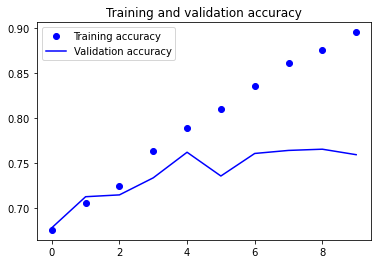

In [19]:
loss = historico.history['accuracy']
val_loss = historico.history['val_accuracy']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

----

### Modelo 02 - CNN com três convoluções, seguido de MaxPooling com grayscale

In [5]:
# Puxando os dados de um diretório contendo outros dois diretórios
import tensorflow as tf
from tensorflow.keras.preprocessing import image

## define o generator escalando as imagens do dataset
train_datagen = image.ImageDataGenerator(validation_split=0.2,
                                         rescale=1/255)

### pega as imagens de um dataset
train_dataset = train_datagen.flow_from_directory(path_dir,
                                                  target_size=(128, 128), # tamanho da base: pixel por pixel
                                                  color_mode = 'grayscale',
                                                  batch_size=64, # puxadas por batch
                                                  class_mode='binary', # binario ou categórico
                                                  subset='training',
                                                  shuffle = True)

### pega as imagens de um dataset
val_dataset = train_datagen.flow_from_directory(path_dir,
                                                target_size=(128, 128),
                                                color_mode = 'grayscale',
                                                batch_size=64,
                                                class_mode='binary',
                                                subset='validation',
                                                shuffle = True)

Found 5912 images belonging to 2 classes.
Found 1478 images belonging to 2 classes.


0.0


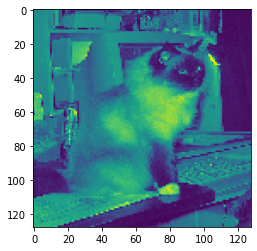

1.0


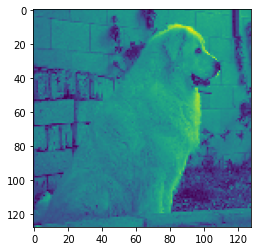

1.0


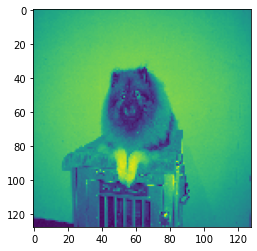

0.0


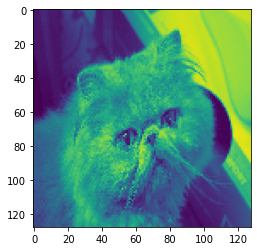

0.0


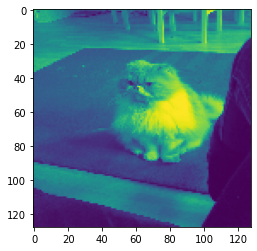

In [6]:
# Visualização de amostras ({0: gato, 1: cachorro})
import matplotlib.pyplot as plt
import numpy as np

for _ in range(5):
    img, label = train_dataset.next()
    print(label[0])
    plt.imshow(img[0])
    plt.show()

In [7]:
# Modelo 02
cnn_gray = Sequential()

# adicionando convolução (5x5) seguido de MaxPooling (2x2)
cnn_gray.add(Conv2D(24, (5,5), activation='relu', input_shape=(128,128,1), padding='same'))
cnn_gray.add(MaxPooling2D())
cnn_gray.add(Conv2D(48, (5,5), activation='relu', padding='same'))
cnn_gray.add(MaxPooling2D())
cnn_gray.add(Conv2D(96, (5,5), activation='relu', padding='same'))
cnn_gray.add(MaxPooling2D())

cnn_gray.add(Flatten())
# Output binário
cnn_gray.add(Dense(1))
cnn_gray.add(Activation('sigmoid'))

cnn_gray.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 24)      624       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 48)        28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        115296    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 96)       0

In [8]:
# binary_crossentropy, problema binário
cnn_gray.compile(loss = 'binary_crossentropy',
            optimizer = 'Adam',
            metrics=['accuracy'])

In [9]:
# Regularização
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0.001,
                   patience = 3,
                   verbose = 1,
                   mode = 'auto')

# Salva a época com melhor acurácia
checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath="model_02_checkpoint",
        save_best_only=True,
        monitor="val_loss")

# Fitting
historico = cnn_gray.fit(train_dataset, 
                    epochs = 20, 
                    batch_size=32,
                    verbose = 1,
                    validation_data = (val_dataset),
                    callbacks = [es, checkpoint])

Epoch 1/20
93/93 [==============================] - ETA: 0s - loss: 0.6030 - accuracy: 0.6737

INFO:tensorflow:Assets written to: model_02_checkpoint\assets


INFO:tensorflow:Assets written to: model_02_checkpoint\assets


93/93 [==============================] - 123s 1s/step - loss: 0.6030 - accuracy: 0.6737 - val_loss: 0.5755 - val_accuracy: 0.6881
Epoch 2/20
93/93 [==============================] - ETA: 0s - loss: 0.5384 - accuracy: 0.7267

INFO:tensorflow:Assets written to: model_02_checkpoint\assets


INFO:tensorflow:Assets written to: model_02_checkpoint\assets


93/93 [==============================] - 125s 1s/step - loss: 0.5384 - accuracy: 0.7267 - val_loss: 0.4918 - val_accuracy: 0.7402
Epoch 3/20
93/93 [==============================] - 124s 1s/step - loss: 0.4909 - accuracy: 0.7627 - val_loss: 0.5047 - val_accuracy: 0.7503
Epoch 4/20
93/93 [==============================] - ETA: 0s - loss: 0.4389 - accuracy: 0.8001

INFO:tensorflow:Assets written to: model_02_checkpoint\assets


INFO:tensorflow:Assets written to: model_02_checkpoint\assets


93/93 [==============================] - 124s 1s/step - loss: 0.4389 - accuracy: 0.8001 - val_loss: 0.4646 - val_accuracy: 0.7781
Epoch 5/20
93/93 [==============================] - 125s 1s/step - loss: 0.4014 - accuracy: 0.8214 - val_loss: 0.4800 - val_accuracy: 0.7706
Epoch 6/20
93/93 [==============================] - 121s 1s/step - loss: 0.3693 - accuracy: 0.8405 - val_loss: 0.5161 - val_accuracy: 0.7727
Epoch 7/20
93/93 [==============================] - 121s 1s/step - loss: 0.3234 - accuracy: 0.8615 - val_loss: 0.5444 - val_accuracy: 0.7842
Epoch 7: early stopping


In [10]:
# Salvando
### em produção
cnn_gray.save('model_02.h5')

In [11]:
# Modelo com melhor
model_cnn_gray = tf.keras.models.load_model('model_02_checkpoint')

In [12]:
# Predict
y_pred = model_cnn_gray.predict(val_dataset)

24/24 [==============================] - 9s 348ms/step


In [13]:
# Evaluate
score = model_cnn_gray.evaluate(val_dataset)

24/24 [==============================] - 11s 439ms/step - loss: 0.4646 - accuracy: 0.7781


In [14]:
# Best val_accuracy
score[1]

0.7780784964561462

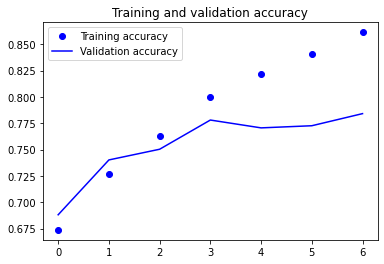

In [15]:
loss = historico.history['accuracy']
val_loss = historico.history['val_accuracy']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

Com gray scale, a acurácia foi maior

----

### Modelo 03 - EfficientNetV2B2 e trainable False (Congelada)

In [16]:
# Puxando os dados de um diretório contendo outros dois diretórios
import tensorflow as tf
from tensorflow.keras.preprocessing import image

## define o generator escalando as imagens do dataset
train_datagen = image.ImageDataGenerator(validation_split=0.2,
                                         rescale=1/255)

### pega as imagens de um dataset
train_dataset = train_datagen.flow_from_directory(path_dir,
                                                  target_size=(128, 128), # tamanho da base: pixel por pixel
                                                  color_mode = 'rgb',
                                                  batch_size=64, # puxadas por batch
                                                  class_mode='binary', # binario ou categórico
                                                  subset='training',
                                                  shuffle = True)

### pega as imagens de um dataset
val_dataset = train_datagen.flow_from_directory(path_dir,
                                                target_size=(128, 128),
                                                color_mode = 'rgb',
                                                batch_size=64,
                                                class_mode='binary',
                                                subset='validation',
                                                shuffle = True)

Found 5912 images belonging to 2 classes.
Found 1478 images belonging to 2 classes.


In [18]:
# Modelo 03 - EfficientNetV2B2
base_model = tf.keras.applications.EfficientNetV2B2(weights = "imagenet", # peso de iamgenet
                                                    input_shape = (128, 128 ,3),
                                                    include_top = False) # esclusão da camada softmax

# Pré treinada congelada
base_model.trainable = False

inputs = tf.keras.Input(shape = (128, 128, 3))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
model_ef = tf.keras.Model(inputs, outputs)

model_ef.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 efficientnetv2-b2 (Function  (None, 4, 4, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d_1   (None, 1408)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_2 (Flatten)         (None, 1408)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1409      
                                                                 
Total params: 8,770,783
Trainable params: 1,409
Non-trainable

In [19]:
from tensorflow.python.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta = 0.001,
                   patience = 5)

model_ef.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_ef.fit(train_dataset,
             epochs=20,
             batch_size=64,
             validation_data=val_dataset,
             callbacks=[es])

Epoch 1/20
93/93 [==============================] - 117s 1s/step - loss: 0.6353 - accuracy: 0.6732 - val_loss: 0.6289 - val_accuracy: 0.6752
Epoch 2/20
93/93 [==============================] - 115s 1s/step - loss: 0.6338 - accuracy: 0.6752 - val_loss: 0.6273 - val_accuracy: 0.6752
Epoch 3/20
93/93 [==============================] - 107s 1s/step - loss: 0.6361 - accuracy: 0.6752 - val_loss: 0.6249 - val_accuracy: 0.6752
Epoch 4/20
93/93 [==============================] - 107s 1s/step - loss: 0.6294 - accuracy: 0.6752 - val_loss: 0.6242 - val_accuracy: 0.6752
Epoch 5/20
93/93 [==============================] - 106s 1s/step - loss: 0.6300 - accuracy: 0.6752 - val_loss: 0.6245 - val_accuracy: 0.6752
Epoch 6/20
93/93 [==============================] - 107s 1s/step - loss: 0.6284 - accuracy: 0.6752 - val_loss: 0.6216 - val_accuracy: 0.6752
Epoch 7/20
93/93 [==============================] - 108s 1s/step - loss: 0.6289 - accuracy: 0.6752 - val_loss: 0.6219 - val_accuracy: 0.6752
Epoch 8/20
93

In [20]:
model_ef.save('model_03.h5')
model_ef_saved = tf.keras.models.load_model('model_03.h5')

In [21]:
y_pred = model_ef_saved.predict(val_dataset)

24/24 [==============================] - 23s 853ms/step


In [22]:
# Evaluate
score = model_ef_saved.evaluate(val_dataset)

24/24 [==============================] - 23s 868ms/step - loss: 0.6188 - accuracy: 0.6752


In [23]:
score[1]

0.6752368211746216

Com a base congelada, a acurácia foi de 67,5%

----

### Modelo 04 - EfficientNetV2B2 e trainable True

In [28]:
# Modelo 04 - EfficientNetV2B2, trainable = False
base_model = tf.keras.applications.EfficientNetV2B2(weights = "imagenet", # peso de iamgenet
                                                    input_shape = (128, 128 ,3),
                                                    include_top = False) # esclusão da camada softmax

# Descongelada
base_model.trainable = True

inputs = tf.keras.Input(shape = (128, 128, 3))
x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
model_ef_02 = tf.keras.Model(inputs, outputs)

model_ef_02.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 efficientnetv2-b2 (Function  (None, 4, 4, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d_4   (None, 1408)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 1)                 1409      
                                                                 
Total params: 8,770,783
Trainable params: 8,688,495
Non-trainable params: 82,288
_________________________________________________________________


In [29]:
from tensorflow.python.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta = 0.01,
                   patience = 2)

model_ef_02.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

historico = model_ef_02.fit(train_dataset,
             epochs=20,
             batch_size=64,
             validation_data=val_dataset,
             callbacks=[es])

Epoch 1/20
93/93 [==============================] - 390s 4s/step - loss: 0.3013 - accuracy: 0.8703 - val_loss: 0.5263 - val_accuracy: 0.7321
Epoch 2/20
93/93 [==============================] - 379s 4s/step - loss: 0.1207 - accuracy: 0.9542 - val_loss: 0.4833 - val_accuracy: 0.7591
Epoch 3/20
93/93 [==============================] - 376s 4s/step - loss: 0.0583 - accuracy: 0.9805 - val_loss: 0.6537 - val_accuracy: 0.6096
Epoch 4/20
93/93 [==============================] - 387s 4s/step - loss: 0.0608 - accuracy: 0.9790 - val_loss: 0.6211 - val_accuracy: 0.6867


In [30]:
model_ef_02.save('model_04.h5')
model_ef02_saved = tf.keras.models.load_model('model_04.h5')

In [31]:
y_pred = model_ef02_saved.predict(val_dataset)

24/24 [==============================] - 21s 812ms/step


In [32]:
# Evaluate accuracy
score = model_ef02_saved.evaluate(val_dataset)
score[1]

24/24 [==============================] - 25s 910ms/step - loss: 0.6211 - accuracy: 0.6867


0.6867388486862183

A acurácia final foi de 68.7%, mas com o menor val_loss foi de 75,9%

----

### Modelo 04 - EfficientNetV2B2 e trainable True + Adição de uma camada

In [33]:
# Puxando os dados de um diretório contendo outros dois diretórios
import tensorflow as tf
from tensorflow.keras.preprocessing import image

## define o generator escalando as imagens do dataset
train_datagen = image.ImageDataGenerator(validation_split=0.2,
                                         rescale=1/255)

### pega as imagens de um dataset
train_dataset = train_datagen.flow_from_directory(path_dir,
                                                  target_size=(128, 128), # tamanho da base: pixel por pixel
                                                  color_mode = 'rgb',
                                                  batch_size=64, # puxadas por batch
                                                  class_mode='binary', # binario ou categórico
                                                  subset='training',
                                                  shuffle = True)

### pega as imagens de um dataset
val_dataset = train_datagen.flow_from_directory(path_dir,
                                                target_size=(128, 128),
                                                color_mode = 'rgb',
                                                batch_size=64,
                                                class_mode='binary',
                                                subset='validation',
                                                shuffle = True)

Found 5912 images belonging to 2 classes.
Found 1478 images belonging to 2 classes.


In [40]:
# Modelo 05 - EfficientNetV2B2, trainable = False e uma camada Dense com 64 neurônios e Dropout de 0.5
base_model = tf.keras.applications.EfficientNetV2B2(weights = "imagenet", # peso de iamgenet
                                                    input_shape = (128, 128 ,3),
                                                    include_top = False) # esclusão da camada softmax


base_model.trainable = True

inputs = tf.keras.Input(shape = (128, 128, 3))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Hidden layers - 1 camada com 64 neurônios
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
x = tf.keras.layers.Dropout(.5)(x)

outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
model_ef_03 = tf.keras.Model(inputs, outputs)

model_ef_03.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 efficientnetv2-b2 (Function  (None, 4, 4, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d_7   (None, 1408)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 32)                45088     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33  

In [41]:
from tensorflow.python.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta = 0.01,
                   patience = 2)

model_ef_03.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

historico = model_ef_03.fit(train_dataset,
             epochs=10,
             batch_size=64,
             validation_data=val_dataset,
             callbacks=[es])

Epoch 1/10
93/93 [==============================] - 389s 4s/step - loss: 0.3326 - accuracy: 0.8532 - val_loss: 0.8187 - val_accuracy: 0.3606
Epoch 2/10
93/93 [==============================] - 394s 4s/step - loss: 0.1649 - accuracy: 0.9435 - val_loss: 0.6898 - val_accuracy: 0.4817
Epoch 3/10
93/93 [==============================] - 375s 4s/step - loss: 0.0916 - accuracy: 0.9689 - val_loss: 0.6590 - val_accuracy: 0.5636
Epoch 4/10
93/93 [==============================] - 379s 4s/step - loss: 0.0650 - accuracy: 0.9775 - val_loss: 1.0504 - val_accuracy: 0.3917
Epoch 5/10
93/93 [==============================] - 371s 4s/step - loss: 0.0737 - accuracy: 0.9736 - val_loss: 0.7215 - val_accuracy: 0.6583


In [42]:
model_ef_03.save('model_05.h5')
model_ef03_saved = tf.keras.models.load_model('model_05.h5')

In [43]:
y_pred = model_ef03_saved.predict(val_dataset)

24/24 [==============================] - 21s 801ms/step


In [44]:
# Evaluate accuracy
score = model_ef03_saved.evaluate(val_dataset)
score[1]

24/24 [==============================] - 24s 923ms/step - loss: 0.7215 - accuracy: 0.6583


0.6583220362663269

Utilizando camadas ocultas, a acuárcia caiu um pouco

----

### A rede Convolucional com três camadas convolucionais seguida de Pooling teve maior acurácia: 77.8%

---